In [1]:
from ucimlrepo import fetch_ucirepo 

In [2]:
# fetch dataset 
online_retail = fetch_ucirepo(id=352) 

In [6]:
online_retail.keys()

dict_keys(['data', 'metadata', 'variables'])

In [13]:
retail_df = online_retail['data']['original']

In [14]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [46]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [47]:
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'])

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from operator import attrgetter
import matplotlib.colors as mcolors

In [64]:
df = retail_df.sort_values(['CustomerID', 'InvoiceDate'])

In [65]:
df.dropna(subset=['CustomerID'], inplace=True)

In [66]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [67]:
df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
Quantity,406829.0,12.061303,-80995.0,2.0,5.0,12.0,80995.0,248.69337
InvoiceDate,406829,2011-07-10 16:30:57.879207424,2010-12-01 08:26:00,2011-04-06 15:02:00,2011-07-31 11:48:00,2011-10-20 13:06:00,2011-12-09 12:50:00,NaN
UnitPrice,406829.0,3.460471,0.0,1.25,1.95,3.75,38970.0,69.315162
CustomerID,406829.0,15287.69057,12346.0,13953.0,15152.0,16791.0,18287.0,1713.600303


In [68]:
n_orders = df.groupby(['CustomerID'])['InvoiceNo'].nunique()
mult_orders_perc = np.sum(n_orders > 1) / df['CustomerID'].nunique()
print(f'{100 * mult_orders_perc:.2f}% of customers ordered more than once.')

69.97% of customers ordered more than once.


In [69]:
n_orders

CustomerID
12346.0     2
12347.0     7
12348.0     4
12349.0     1
12350.0     1
           ..
18280.0     1
18281.0     1
18282.0     3
18283.0    16
18287.0     3
Name: InvoiceNo, Length: 4372, dtype: int64

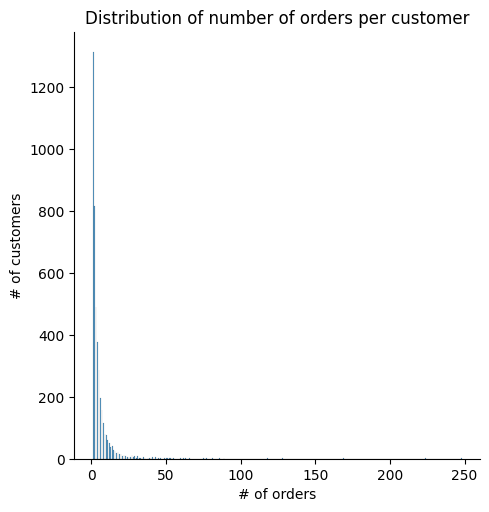

In [70]:
# ax = sns.distplot(n_orders, kde=False, hist=True)
ax = sns.displot(n_orders, )

ax.set(title='Distribution of number of orders per customer',
       xlabel='# of orders', 
       ylabel='# of customers');

In [71]:
df = df[['CustomerID', 'InvoiceNo', 'InvoiceDate']].drop_duplicates().reset_index(drop=True)

In [72]:
df.head()

,CustomerID,InvoiceNo,InvoiceDate
0,12346.0,541431,2011-01-18 10:01:00
1,12346.0,C541433,2011-01-18 10:17:00
2,12347.0,537626,2010-12-07 14:57:00
3,12347.0,542237,2011-01-26 14:30:00
4,12347.0,549222,2011-04-07 10:43:00


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22221 entries, 0 to 22220
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   CustomerID   22221 non-null  float64       
 1   InvoiceNo    22221 non-null  object        
 2   InvoiceDate  22221 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 520.9+ KB


In [74]:
df['order_month'] = df['InvoiceDate'].dt.to_period('M')

In [75]:
df.head()

,CustomerID,InvoiceNo,InvoiceDate,order_month
0,12346.0,541431,2011-01-18 10:01:00,2011-01
1,12346.0,C541433,2011-01-18 10:17:00,2011-01
2,12347.0,537626,2010-12-07 14:57:00,2010-12
3,12347.0,542237,2011-01-26 14:30:00,2011-01
4,12347.0,549222,2011-04-07 10:43:00,2011-04


In [76]:
df['cohort'] = df.groupby('CustomerID')['InvoiceDate'] \
                 .transform('min') \
                 .dt.to_period('M') 

In [79]:
df.head(20)

,CustomerID,InvoiceNo,InvoiceDate,order_month,cohort
0,12346.0,541431,2011-01-18 10:01:00,2011-01,2011-01
1,12346.0,C541433,2011-01-18 10:17:00,2011-01,2011-01
2,12347.0,537626,2010-12-07 14:57:00,2010-12,2010-12
3,12347.0,542237,2011-01-26 14:30:00,2011-01,2010-12
4,12347.0,549222,2011-04-07 10:43:00,2011-04,2010-12
5,12347.0,556201,2011-06-09 13:01:00,2011-06,2010-12
6,12347.0,562032,2011-08-02 08:48:00,2011-08,2010-12
7,12347.0,573511,2011-10-31 12:25:00,2011-10,2010-12
8,12347.0,581180,2011-12-07 15:52:00,2011-12,2010-12
9,12348.0,539318,2010-12-16 19:09:00,2010-12,2010-12


In [88]:
df['InvoiceDate'].dt.quarter

0        1
1        1
2        4
3        1
4        2
        ..
22216    4
22217    4
22218    2
22219    4
22220    4
Name: InvoiceDate, Length: 22221, dtype: int32

In [80]:
df_cohort = df.groupby(['cohort', 'order_month']) \
              .agg(n_customers=('CustomerID', 'nunique')) \
              .reset_index(drop=False)

In [81]:
df_cohort

,cohort,order_month,n_customers
0,2010-12,2010-12,948
1,2010-12,2011-01,362
2,2010-12,2011-02,317
3,2010-12,2011-03,367
4,2010-12,2011-04,341
...,...,...,...
86,2011-10,2011-11,93
87,2011-10,2011-12,46
88,2011-11,2011-11,321
89,2011-11,2011-12,43


In [82]:
df_cohort['period_number'] = (df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))

In [83]:
df_cohort

,cohort,order_month,n_customers,period_number
0,2010-12,2010-12,948,0
1,2010-12,2011-01,362,1
2,2010-12,2011-02,317,2
3,2010-12,2011-03,367,3
4,2010-12,2011-04,341,4
...,...,...,...,...
86,2011-10,2011-11,93,1
87,2011-10,2011-12,46,2
88,2011-11,2011-11,321,0
89,2011-11,2011-12,43,1


In [84]:
cohort_pivot = df_cohort.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'n_customers')

In [85]:
cohort_pivot

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,,
2010-12,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
df['InvoiceDate'].min()

Timestamp('2010-12-01 08:26:00')

In [94]:
import datetime as dt

In [116]:
online = retail_df.dropna(subset=['CustomerID']).copy()

In [143]:
def get_date_int(df, column) :
    
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    quarter = df[column].dt.quarter
    half_year = np.where(df[column].dt.month.le(6),1,2)
    return year, month, day, quarter, half_year

In [144]:
def get_month(x): return dt.datetime(x.year, x.month, 1)
online['InvoiceMonth'] = online['InvoiceDate'].apply(get_month)
grouping = online.groupby('CustomerID')[ 'InvoiceMonth']
online['CohortMonth'] = grouping.transform('min')
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1


In [145]:
invoice_year, invoice_month, _, invoice_qtr, invoice_half_yr  = get_date_int(online, 'InvoiceMonth')

cohort_year, cohort_month, _, cohort_qtr, cohort_half_yr = get_date_int(online, 'CohortMonth')

In [147]:
invoice_half_yr

array([2, 2, 2, ..., 2, 2, 2])

In [148]:
years_diff = invoice_year - cohort_year

months_diff = invoice_month - cohort_month

qtr_diff = invoice_qtr - cohort_qtr

half_yr_diff = invoice_half_yr - cohort_half_yr

In [153]:
online['CohortIndex'] = years_diff * 2 + half_yr_diff 
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,0


In [154]:
online.sample(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
186605,552874,22636,CHILDS BREAKFAST SET CIRCUS PARADE,2,2011-05-12 09:40:00,8.50,12621.0,Germany,2011-05-01,2010-12-01,1
271781,560716,22727,ALARM CLOCK BAKELIKE RED,6,2011-07-20 13:26:00,3.75,17675.0,United Kingdom,2011-07-01,2010-12-01,2
91091,544087,21376,LARGE TALL CAMPHOR WOOD TOADSTOOL,1,2011-02-15 17:02:00,5.45,17530.0,United Kingdom,2011-02-01,2010-12-01,1
520712,580296,23346,SPACEBOY BEAKER,3,2011-12-02 13:49:00,1.25,13780.0,United Kingdom,2011-12-01,2011-06-01,1
409033,572037,22734,SET OF 6 RIBBONS VINTAGE CHRISTMAS,8,2011-10-20 12:07:00,2.89,17365.0,United Kingdom,2011-10-01,2011-01-01,1
395207,571028,21802,CHRISTMAS TREE HEART DECORATION,4,2011-10-13 12:21:00,0.42,16770.0,United Kingdom,2011-10-01,2010-12-01,2
199334,554096,22568,FELTCRAFT CUSHION OWL,4,2011-05-22 12:51:00,3.75,14921.0,United Kingdom,2011-05-01,2011-05-01,0
103151,545054,21442,GREEN BIRDHOUSE DECORATION,2,2011-02-27 12:41:00,0.85,14472.0,United Kingdom,2011-02-01,2010-12-01,1
384183,570108,22144,CHRISTMAS CRAFT LITTLE FRIENDS,6,2011-10-07 12:25:00,2.10,13004.0,United Kingdom,2011-10-01,2010-12-01,2
351026,567659,21500,PINK POLKADOT WRAP,25,2011-09-21 14:55:00,0.42,17475.0,United Kingdom,2011-09-01,2011-09-01,0


In [155]:
online['CohortIndex'].unique()

array([0, 1, 2])

In [156]:
grouping = online.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth',columns= 'CohortIndex', values= 'CustomerID')
print(cohort_counts)

CohortIndex      0      1      2
CohortMonth                     
2010-12-01   948.0  698.0  712.0
2011-01-01   421.0  297.0    NaN
2011-02-01   380.0  247.0    NaN
2011-03-01   440.0  271.0    NaN
2011-04-01   299.0  175.0    NaN
2011-05-01   279.0  171.0    NaN
2011-06-01   235.0  152.0    NaN
2011-07-01   191.0    NaN    NaN
2011-08-01   167.0    NaN    NaN
2011-09-01   298.0    NaN    NaN
2011-10-01   352.0    NaN    NaN
2011-11-01   321.0    NaN    NaN
2011-12-01    41.0    NaN    NaN


In [129]:
df[''] = np.where(df['InvoiceDate'].dt.month.le(6), 1, 2)

In [157]:
import time

In [158]:
time.sleep(10)